In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

## A) Loading the Dataset

In [2]:
dataset = pd.read_csv("powerline_dataset.csv")
dataset = dataset[['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']] # Since there were 2 additional noisy columns in csv

## B) Divide the dataset into training and testing sets

In [3]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

train_index, test_index = next(split.split(dataset, dataset['Output (S)']))
train_set, test_set = dataset.iloc[train_index], dataset.iloc[test_index]

## C) Training an SVM classifier

In [4]:
# Normalizing dataset before sending into SVM

scaler = StandardScaler()
scaler.fit(dataset.iloc[:, 1:])
train, test = train_set.to_numpy(), test_set.to_numpy()
train[:, 1:], test[:, 1:] = scaler.transform(train_set.iloc[:, 1:]), scaler.transform(test_set.iloc[:, 1:])

In [5]:
svm_clf = SVC(C=1000, kernel="rbf", random_state=42)
svm_clf.fit(train[:, 1:], train[:, 0])

SVC(C=1000, random_state=42)

## D) Reporting the Results of SVM classifier

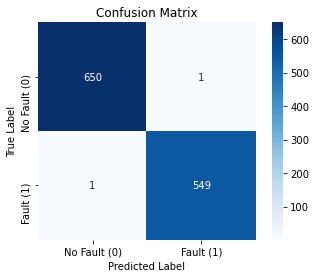

In [6]:
y_pred = svm_clf.predict(test[:, 1:])
y_test = test[:, 0]

conf_mat = confusion_matrix(y_test, y_pred)

lang = ['No Fault (0)', 'Fault (1)']
ax = plt.axes()
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=True, ax=ax, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [7]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred, y_test)

print("The Evaluation Metrics of the SVM Classifier (on the test set) is as follows:\n")

print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative, end='\n\n')

print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative), end='\n\n')

print("Accuracy:", accuracy)

The Evaluation Metrics of the SVM Classifier (on the test set) is as follows:

True Positives: 549
True Negatives: 650
False Positives: 1
False Negatives: 1

Precision: 0.9981818181818182
Recall: 0.9981818181818182

Accuracy: 0.9983347210657785


## E, F) Training & Evaluating Decision Tree and Random Forest classifiers

### (i) Decision Tree:

In [8]:
# Since only min_samples_leaf=1 gave the best result, Regularization was not required
tree_clf = DecisionTreeClassifier(max_depth=14, random_state=42)
tree_clf.fit(train_set.iloc[:, 1:], train_set.iloc[:, 0])

DecisionTreeClassifier(max_depth=14, random_state=42)

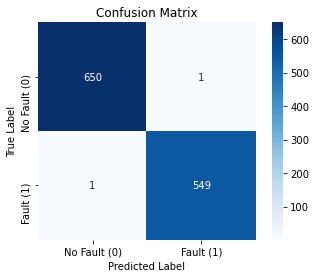

In [9]:
y_pred = tree_clf.predict(test_set.iloc[:, 1:])

conf_mat = confusion_matrix(y_test, y_pred)

lang = ['No Fault (0)', 'Fault (1)']
ax = plt.axes()
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=True, ax=ax, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [10]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred, y_test)

print("The Evaluation Metrics of the Decision Tree Classifier (on the test set) is as follows:\n")

print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative, end='\n\n')

print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative), end='\n\n')

print("Accuracy:", accuracy)

The Evaluation Metrics of the Decision Tree Classifier (on the test set) is as follows:

True Positives: 549
True Negatives: 650
False Positives: 1
False Negatives: 1

Precision: 0.9981818181818182
Recall: 0.9981818181818182

Accuracy: 0.9983347210657785


### (ii) Random Forest:

In [11]:
forest_clf = RandomForestClassifier(n_estimators=162, random_state=42)
forest_clf.fit(train_set.iloc[:, 1:], train_set.iloc[:, 0])

RandomForestClassifier(n_estimators=162, random_state=42)

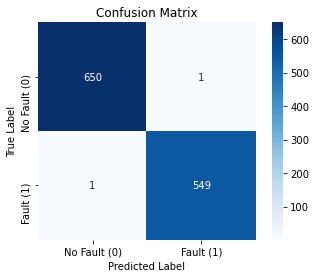

In [12]:
y_pred = forest_clf.predict(test_set.iloc[:, 1:])

conf_mat = confusion_matrix(y_test, y_pred)

lang = ['No Fault (0)', 'Fault (1)']
ax = plt.axes()
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=True, ax=ax, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [13]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred, y_test)

print("The Evaluation Metrics of the Random Forest Classifier (on the test set) is as follows:\n")

print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative, end='\n\n')

print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative), end='\n\n')

print("Accuracy:", accuracy)

The Evaluation Metrics of the Random Forest Classifier (on the test set) is as follows:

True Positives: 549
True Negatives: 650
False Positives: 1
False Negatives: 1

Precision: 0.9981818181818182
Recall: 0.9981818181818182

Accuracy: 0.9983347210657785


## G) Final Comparison
<br><br>
The observation is that all 3 models when **well tuned** gives the **exact same result**.<br>
Their accuracy, precision, recall and all parameters are same are over 99.8%.<br><br>

The probable reasons for this are as follows:<br>
1) The given dataset is well balanced, and has less noises.<br>
2) The "StratifiedShuffleSplit" function of sklearn made sure that the classes are split evenly among the training anf testing set, further promoting the balance.<br><br>

The following tuning were done on each model:<br>
1) The SVM classifier performed poorly when linear, polynomial and SGD kernels were used giving an accuracy of only around 40% to 70%. But however when the "rbf" kernel was used and the regularization parameter 'C' was set to 1000% the accuracy improved to more than 99.8%.<br>
2) The Decision Tree which was expected to give the least accuracy surprisingly gave the best result, since the correlation between the attributes in the dataset was simple and pretty consistent. It is to be noted here that, there seemed to be no overfitting in the data, since increasing the 'min_samples_leaf' parameter to value over 1, actually cause the accuracy of the test set to reduce instead of increasing. And the best result was achieved either by setting min_samples_leaf=1 or max_depth=14 or above.<br>
3) The Random Forest method gave the best accuracy when 'n_estimators' was set at a value of 162 or above. The accuracy readuced when 'n_estimators' was set at a lower value.<br><br>

Hence my take on the best classifier is as follows:<br>
1) For this given simple dataset, "Decision Tree" is the best because it has the least time complexity for training compared to the other 2 methods, and gives the same accuracy as the other 2, without even requiring the dataset to be normalized.<br>
2) But for a lot of conventinal datasets, when noise in dataset is present, or when the dataset is not well balanced, but not too complex, Random Forest may give a better performance.<br>
3) When the dataset is noisy and is complex, SVM with a proper regularization constant, and "rbf" kernel may give the best result.